In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data reading

In [161]:
dataframe=pd.read_csv("HistoricalData_1701452434784.csv")
dataframe

,Date,Close/Last,Volume,Open,High,Low
0,11/30/2023,$146.09,65814020,$144.76,$146.93,$144.332
1,11/29/2023,$146.32,40610910,$147.85,$148.54,$145.97
2,11/28/2023,$147.03,42711680,$146.98,$147.5999,$145.53
3,11/27/2023,$147.73,53762430,$147.53,$149.26,$146.88
4,11/24/2023,$146.74,22378380,$146.70,$147.20,$145.32
...,...,...,...,...,...,...
2512,12/06/2013,$19.3475,39693420,$19.4175,$19.4175,$19.1915
2513,12/05/2013,$19.2245,37487040,$19.3325,$19.3325,$19.0685
2514,12/04/2013,$19.298,47096380,$19.175,$19.4845,$19.0746
2515,12/03/2013,$19.233,74047040,$19.5055,$19.5475,$19.155


In [163]:
dataframe.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

# convert the object data into numeric

In [165]:
for i in dataframe.iloc[:,1:]:
  if(i!="Volume"):
    dataframe[i]=[j[1:] for j in dataframe[i]]


In [169]:
for i in dataframe.iloc[:,1:]:
  dataframe[i]=dataframe[i].astype('float')

In [171]:
dataframe.dtypes

Date           object
Close/Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

# checking Null values

In [173]:
dataframe.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

# final dataset

In [175]:
data=dataframe.drop(["Date","Volume","High","Low"],axis=1)
data

,Close/Last,Open
0,146.0900,144.7600
1,146.3200,147.8500
2,147.0300,146.9800
3,147.7300,147.5300
4,146.7400,146.7000
...,...,...
2512,19.3475,19.4175
2513,19.2245,19.3325
2514,19.2980,19.1750
2515,19.2330,19.5055


# checking outliers present or not


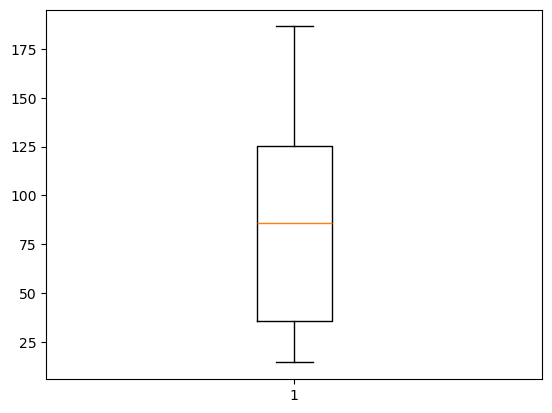

{'whiskers': [<matplotlib.lines.Line2D at 0x28f10165b20>,
 'caps': [<matplotlib.lines.Line2D at 0x28f10166210>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f101657f0>],
 'medians': [<matplotlib.lines.Line2D at 0x28f10166930>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0ed95dc0>],
 'means': []}

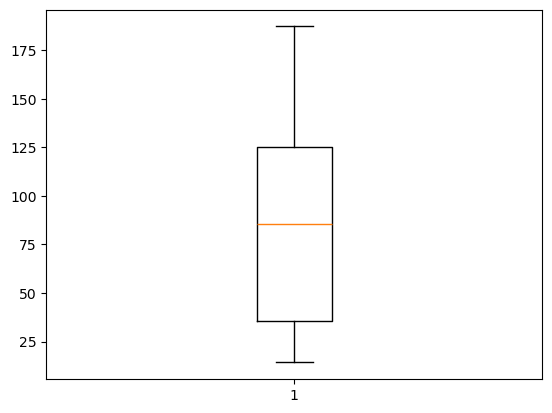

In [177]:
plt.boxplot(data["Close/Last"])
plt.show()
plt.boxplot(data["Open"])

# ploting the close price and open price

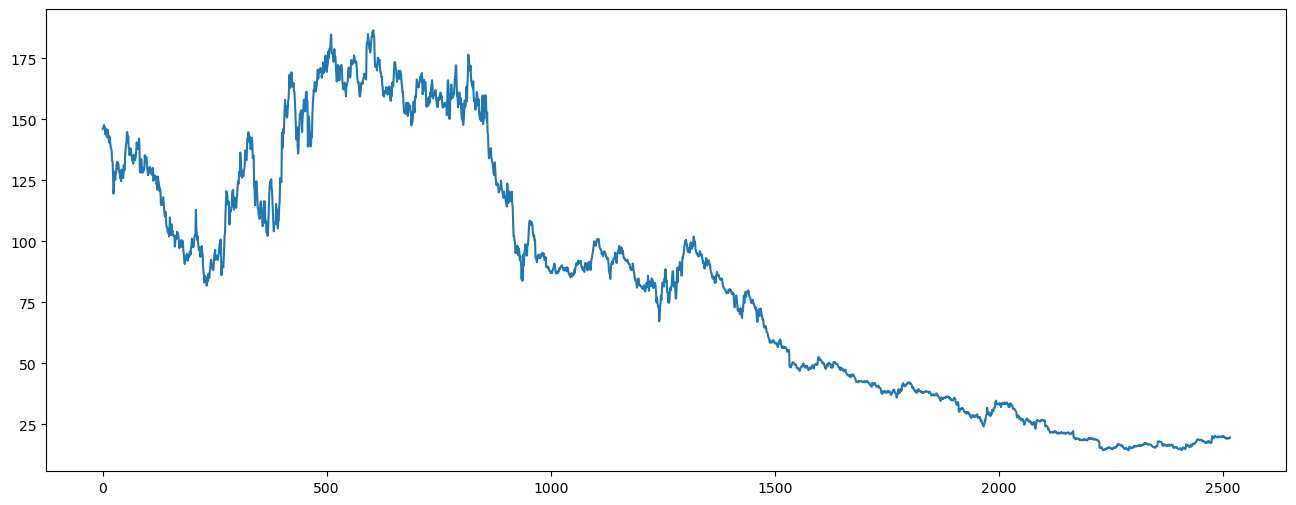

In [178]:

data["Close/Last"].plot(figsize =(16,6))
plt.show()

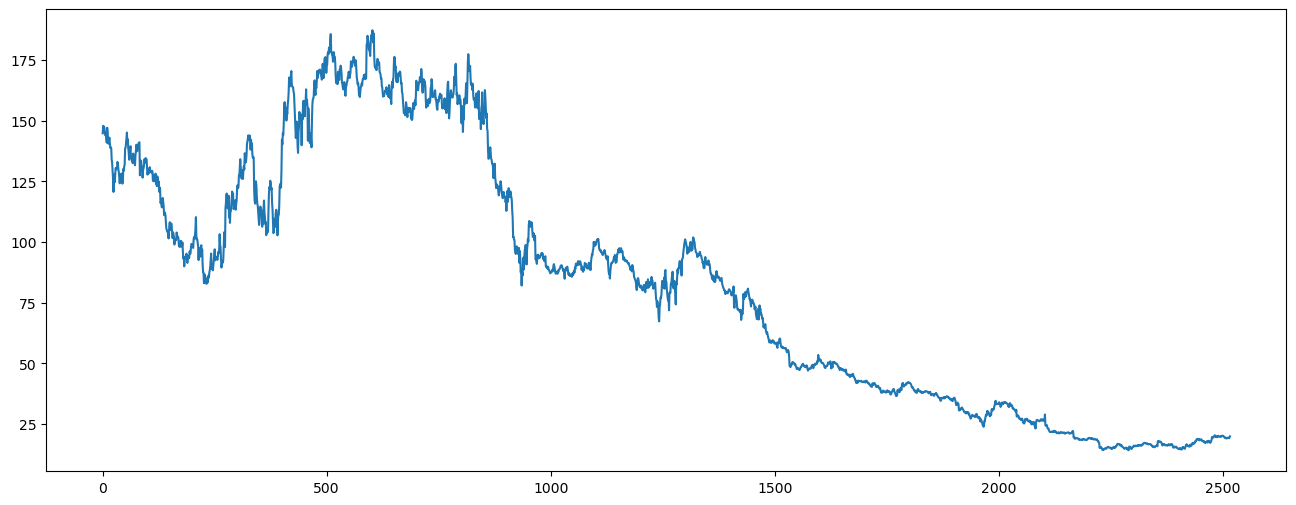

In [180]:
data["Open"].plot(figsize =(16,6))
plt.show()

# Scaling the data

In [183]:
train=pd.DataFrame(data["Close/Last"])
label=pd.DataFrame(data["Open"])

In [185]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train=sc.fit_transform(train)
print(train)

[[ 1.22126494]
 [ 1.22574169]
 [ 1.23956121]
 ...
 [-1.24662937]
 [-1.24789453]
 [-1.24045924]]


In [187]:
sc.inverse_transform(train)

array([[146.09 ],
       [146.32 ],
       [147.03 ],
       ...,
       [ 19.298],
       [ 19.233],
       [ 19.615]])

# Splitting the data

In [189]:
from sklearn.model_selection import train_test_split

In [191]:
x_train,x_test,y_train,y_test=train_test_split(train,label,random_state=30,test_size=0.30)

In [193]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1761, 1), (756, 1), (1761, 1), (756, 1))

# Model building

In [195]:
from sklearn.linear_model import LinearRegression

In [197]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Prediction values

In [199]:
y_prediction=model.predict(train)
y_prediction

array([[146.130669  ],
       [146.36072926],
       [147.07091526],
       ...,
       [ 19.30545262],
       [ 19.24043559],
       [ 19.62253567]])

In [205]:
y_pred=model.predict(x_test)
y_pred

array([[114.84247441],
       [ 16.68826716],
       [159.43165262],
       [ 62.36222948],
       [162.53996671],
       [ 92.79269943],
       [124.93211696],
       [158.33836628],
       [ 38.24841391],
       [ 86.53606077],
       [ 39.01261406],
       [136.48814356],
       [ 20.36022887],
       [ 85.1647016 ],
       [ 16.12862059],
       [ 21.54653958],
       [ 15.65499654],
       [ 19.01537665],
       [121.12712041],
       [ 97.63796844],
       [ 24.15922386],
       [ 77.2691337 ],
       [138.20559337],
       [ 33.96429187],
       [ 49.76543029],
       [ 93.43686814],
       [ 34.70998717],
       [ 58.73077838],
       [ 79.11611744],
       [ 39.45623025],
       [ 94.34210523],
       [ 15.27939817],
       [164.28142281],
       [173.41881596],
       [ 83.18168224],
       [106.96091018],
       [ 16.49021529],
       [ 76.11983269],
       [ 28.05374386],
       [ 31.03552481],
       [155.58664559],
       [ 49.64489873],
       [ 93.92399572],
       [113

# Accuracy of data 

In [234]:
model.score(x_test,y_test)

0.9989903175236448

In [211]:
from sklearn.metrics import r2_score

In [238]:
r2_score(y_pred,y_test)

0.9989890637631624

# Best fit line

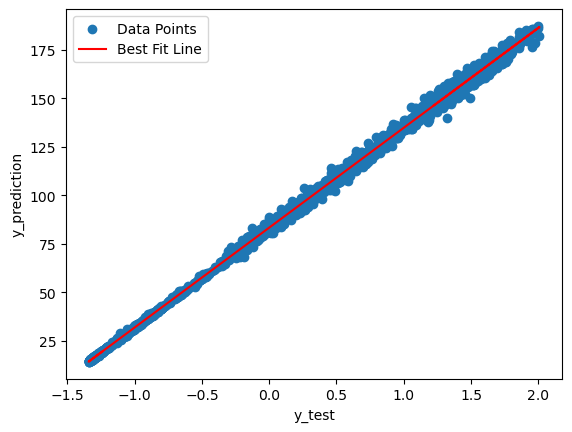

In [219]:
plt.scatter(train,label,label='Data Points')
plt.plot(train, y_prediction, color='red', label='Best Fit Line')
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.legend()
plt.show()